# LeNet-5
이 파일은 LeNet-5(1998)논문을 직접 구현해보는 파일이다  
https://ieeexplore.ieee.org/document/726791

In [1]:
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
# MNIST 데이터셋 로드 및 전처리
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [2]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28, 1) (60000, 10) (10000, 28, 28, 1) (10000, 10)


1. 간단하게 Tensorflow를 사용해 비슷하게만 따라하는 방법

In [3]:
# 필요 library
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import ZeroPadding2D

In [4]:
LeNet = Sequential()
LeNet.add(ZeroPadding2D(padding=2))
LeNet.add(Conv2D(filters=6, kernel_size=5, padding='valid', strides=1, activation='tanh'))
LeNet.add(AveragePooling2D(pool_size=2, strides=2))
LeNet.add(Conv2D(filters=16, kernel_size=5, padding='valid', strides=1, activation='tanh'))
LeNet.add(AveragePooling2D(pool_size=2, strides=2))
LeNet.add(Flatten())
LeNet.add(Dense(units=120, activation='tanh'))
LeNet.add(Dense(units=84, activation='tanh'))
LeNet.add(Dense(units=10, activation='softmax'))

LeNet.build(input_shape=(None,28,28,1))
LeNet.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPaddin  (None, 32, 32, 1)         0         
 g2D)                                                            
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 14, 14, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                       

In [5]:
LeNet.compile(optimizer='adam', loss='categorical_crossentropy', )
history = LeNet.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), )


Epoch 1/20

1875/1875 [==============================] - 7s 3ms/step - loss: 0.2221 - val_loss: 0.1014
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0842 - val_loss: 0.0729
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0579 - val_loss: 0.0566
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0447 - val_loss: 0.0533
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0365 - val_loss: 0.0497
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0300 - val_loss: 0.0452
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0254 - val_loss: 0.0491
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0215 - val_loss: 0.0427
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0192 - val_loss: 0.0558
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0

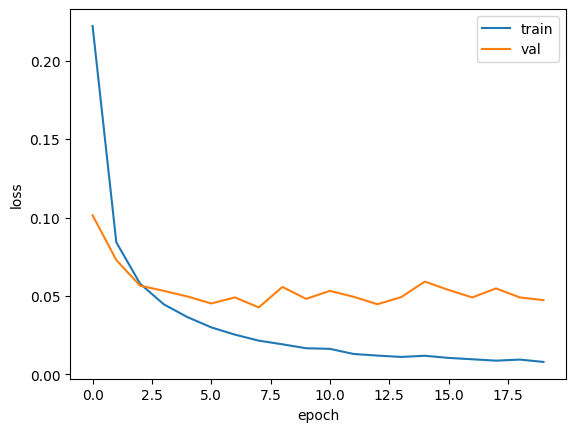

In [6]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()